# SALMA NABILAH ROUF
### SERTIFIKASI BNSP
22 DESEMBER 2022

METODE CRISP-DM

##  Business Understanding

Sumanto seorang kredit analis sebuah Bank ABC sedang memiliki masalah karena banyaknya nasabah yang mengalami kredit macet. Untuk mengantisipasi masalah tersebut, dia mencoba melakukan analisis terhadap data nasabah dan status pembayaran cicilan kreditnya agar dapat memprediksi profile debitur (penghutang) dari aspek lancar atau macet kreditnya.

## Tujuan
Untuk memprediksi calon nasabah apakah dapat membayar kredit lancar atau macet berdasarkan data history tahun lalu.(data terlampir)

# Data Understanding

In [41]:
#import library
import pandas as pd
import numpy as np

In [42]:
#mengambil data
df = pd.read_csv('creditapproval-data_kotor.csv')
#menampilkan data
df

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


Data terdiri dari 766 baris dan 24 kolom

**Pendefinisian Variabel** 

<br>

`jenis_kelamin` = Jenis kelamin terdiri dari P dan L \
`umur`          = usia nasabah \
`jml_pinjaman`  = jumlah pinjaman nasabah \
`jkw`           = jangka waktu (bulan) \
`jml_angsuran_per_bulan` = jumlah angsuran yyng harus dibayar tiap bulan \
`type_pinjaman`  = tipe pinjaman \
`jenis_pinjaman`  = jenis pinjaman \
`bi_sektor_ekonomi` = Sektor Ekonomi BI \
`col` \
`bi_golongan_debitur` = golongan debitur \
`bi_gol_penjamin` = golongan penjamin \
`saldo_nominatif` = saldo nominatif nasabah 
<br>
`tunggakan_pokok` = tunggakan pokok yang harus dibayar nasabah 
<br>
`tunggakan_bunga` = tunggakan bunga yang harus dibayar nasabah  <br>
`status kredit` = status kredit nasabah          

In [43]:
#mengecek tipe data
df.dtypes

nama_nasabah               object
jenis_kelamin              object
umur                      float64
jml_pinjaman              float64
jkw                       float64
jml_angsuran_per_bulan    float64
type_pinjaman               int64
jenis_pinjaman              int64
bi_sektor_ekonomi         float64
col                         int64
bi_golongan_debitur         int64
bi_gol_penjamin             int64
saldo_nominatif           float64
tunggakan_pokok           float64
tunggakan_bunga           float64
status kredit              object
dtype: object

**Dengan rincian** \
object = data kategorik (berupa string) \
float64 = data numerik \
int64 = data numerik integer

# Data Cleaning dan Data Preparation

In [44]:
df.nunique()

nama_nasabah              766
jenis_kelamin               6
umur                       58
jml_pinjaman              328
jkw                        51
jml_angsuran_per_bulan    449
type_pinjaman               1
jenis_pinjaman              5
bi_sektor_ekonomi           3
col                         2
bi_golongan_debitur         3
bi_gol_penjamin             5
saldo_nominatif           528
tunggakan_pokok           490
tunggakan_bunga           142
status kredit               2
dtype: int64

Dapat dilihat terdapat beberapa kolom memiliki tipe data `object` sedangkan seharusnya adalah `category` agar lebih efektif karena memiliki jumlah nilai unik sedikit. Kolom tersebut adalah `Jenis Kelamin`, `type_pinjaman`,  `jenis_pinjaman`, `bi_sektor_ekonomi`, `col`, `bi_golongan_debitur`, `bi_gol_penjamin`, dan kolom `status kredit`.

In [45]:
# Mengumpulkan kolom-kolom yang dingin diubah pada 1 list
kolom_diubah = ['jenis_kelamin', 'type_pinjaman',  'jenis_pinjaman', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin', 'status kredit']

df[kolom_diubah] = df[kolom_diubah].astype('category')
df.dtypes

nama_nasabah                object
jenis_kelamin             category
umur                       float64
jml_pinjaman               float64
jkw                        float64
jml_angsuran_per_bulan     float64
type_pinjaman             category
jenis_pinjaman            category
bi_sektor_ekonomi          float64
col                       category
bi_golongan_debitur       category
bi_gol_penjamin           category
saldo_nominatif            float64
tunggakan_pokok            float64
tunggakan_bunga            float64
status kredit             category
dtype: object

**Tipe data sudah sesuai**

In [46]:
#menelaah data
# menampilkan statistik deskriptif/rincian data
df.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,bi_sektor_ekonomi,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,757.000000,7.660000e+02,758.000000,7.660000e+02,765.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,29.073976,2.712483e+06,19.011873,2.333917e+05,6013.045752,2.007386e+06,7.900853e+05,8.771708e+04
std,264.552192,9.995602e+06,32.231431,5.489682e+05,216.196305,8.711282e+06,4.139217e+06,5.682318e+05
min,-7162.000000,8.333333e+04,1.000000,0.000000e+00,6000.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,32.000000,8.489286e+05,8.000000,6.750000e+04,6000.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,6000.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,6000.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,9990.000000,2.094041e+08,9.161212e+07,1.100000e+07


In [47]:
# menampilkan info dari data global superstore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            766 non-null    object  
 1   jenis_kelamin           766 non-null    category
 2   umur                    757 non-null    float64 
 3   jml_pinjaman            766 non-null    float64 
 4   jkw                     758 non-null    float64 
 5   jml_angsuran_per_bulan  766 non-null    float64 
 6   type_pinjaman           766 non-null    category
 7   jenis_pinjaman          766 non-null    category
 8   bi_sektor_ekonomi       765 non-null    float64 
 9   col                     766 non-null    category
 10  bi_golongan_debitur     766 non-null    category
 11  bi_gol_penjamin         766 non-null    category
 12  saldo_nominatif         766 non-null    float64 
 13  tunggakan_pokok         766 non-null    float64 
 14  tunggakan_bunga         76

In [48]:
#memvalidasi data
#cek missing value
df.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      9
jml_pinjaman              0
jkw                       8
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

- terdapat 9 row kolom `umur` memiliki missing value
- terdapat 8 row kolom `jkw` memiliki missing value
- terdapat 1 row kolom `bi_sektor_ekonomi` memiliki missing value

In [49]:
#mengatasi missing value pada kolom umur
rata_umur = df['umur'].mean()
df['umur'] = df['umur'].fillna(rata_umur)

In [50]:
#menangani missing value di kolom jkw
rata_jkw = df['jkw'].mean()
df['jkw'] = df['jkw'].fillna(rata_jkw)

In [51]:
#menangani missing value di kolom bi_sektor_ekonomi
rata_bi_sektor_ekonomi = df['bi_sektor_ekonomi'].mean()
df['bi_sektor_ekonomi'] = df['bi_sektor_ekonomi'].fillna(rata_bi_sektor_ekonomi)

In [52]:
#mengecek kembali jumlah missing value
df.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

**Data sudah tidak memiliki missing value**

In [53]:
#Pengecekan Keunikan data category
df.nunique()

nama_nasabah              766
jenis_kelamin               6
umur                       59
jml_pinjaman              328
jkw                        52
jml_angsuran_per_bulan    449
type_pinjaman               1
jenis_pinjaman              5
bi_sektor_ekonomi           4
col                         2
bi_golongan_debitur         3
bi_gol_penjamin             5
saldo_nominatif           528
tunggakan_pokok           490
tunggakan_bunga           142
status kredit               2
dtype: int64

In [54]:
df['jenis_kelamin'].unique()

['P', 'L', 'WANITA', 'LAKI-LAKI', 'PRIA', 'PEREMPUAN']
Categories (6, object): ['L', 'LAKI-LAKI', 'P', 'PEREMPUAN', 'PRIA', 'WANITA']

- terdapat perbedaan pendefinisian jenis kelamin sehingga perlu disamakan menjadi P dan L saja

In [55]:
df["jenis_kelamin"] = df["jenis_kelamin"].str.replace("WANITA", "P")
df["jenis_kelamin"] = df["jenis_kelamin"].str.replace("PEREMPUAN", "P")
df["jenis_kelamin"] = df["jenis_kelamin"].str.replace("LAKI-LAKI", "L")
df["jenis_kelamin"] = df["jenis_kelamin"].str.replace("PRIA", "L")

In [56]:
df["jenis_kelamin"].unique()

array(['P', 'L'], dtype=object)

In [57]:
#mengecek data duplikat
df.duplicated().sum()

0

**Tidak terdapat data duplikat**

In [58]:
#membuat file csv data bersih
df.to_csv('data_clean.csv')

# Modelling

In [59]:
#Mengimport dan Menginstall Library
!pip install pycaret
pip install numba==0.53
pip install shap
pip install --upgrade xlrd
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
x = df.loc[:, df.columns != 'status kredit']
y = df.loc[:, df.columns == 'status kredit']

In [61]:
x

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
0,x1,P,40.000000,345000.0,1.000000,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0
1,x2,L,31.000000,350000.0,7.000000,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0
2,x3,L,29.073976,649926.0,6.000000,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0
3,x4,P,2.000000,459168.0,19.011873,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0
4,x5,P,34.000000,3055499.0,8.000000,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.000000,1000000.0,16.000000,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0
762,x763,P,36.000000,1000000.0,12.000000,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0
763,x764,L,28.000000,2000000.0,10.000000,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0
764,x765,P,31.000000,1312500.0,7.000000,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0


In [62]:
y

,status kredit
0,MACET
1,MACET
2,MACET
3,MACET
4,MACET
...,...
761,MACET
762,MACET
763,MACET
764,MACET


In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
columns = x_train.columns

In [65]:
clf1 = setup(data = df, 
             target = 'status kredit',
             numeric_imputation = 'mean',
             numeric_features= ['umur', 'jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan', 'col', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga'],
             categorical_features = ['jenis_kelamin','type_pinjaman','jenis_pinjaman', 'bi_sektor_ekonomi','bi_golongan_debitur','bi_gol_penjamin'], 
             ignore_features = ['nama_nasabah'],
             silent = True
             )

,Description,Value
0,session_id,3348
1,Target,status kredit
2,Target Type,Binary
3,Label Encoded,"LANCAR: 0, MACET: 1"
4,Original Data,"(766, 16)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['jenis_kelamin',
                                                            'type_pinjaman',
                                                            'jenis_pinjaman',
                                                            'bi_sektor_ekonomi',
                                                            'bi_golongan_debitur',
                                                            'bi_gol_penjamin'],
                                      display_types=False,
                                      features_todrop=['nama_nasabah'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['umur',
                                             

In [66]:
#Pengecekan nilai Accuracy, Precision, F1 Score dengan membandingan menggunakan beragam model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9571,0.9896,0.9765,0.9649,0.9704,0.8927,0.8945,0.128
gbc,Gradient Boosting Classifier,0.9534,0.9876,0.9818,0.9557,0.9682,0.8809,0.8844,0.124
ada,Ada Boost Classifier,0.9515,0.9811,0.9688,0.9644,0.9663,0.8797,0.8811,0.111
rf,Random Forest Classifier,0.9495,0.9890,0.9791,0.9538,0.9656,0.8705,0.8756,0.221
et,Extra Trees Classifier,0.9254,0.9741,0.9687,0.9316,0.9493,0.8086,0.8143,0.182
dt,Decision Tree Classifier,0.9178,0.9012,0.9399,0.9464,0.9427,0.7971,0.7994,0.015
lr,Logistic Regression,0.9105,0.9459,0.9559,0.9252,0.9390,0.7701,0.7785,0.518
knn,K Neighbors Classifier,0.9013,0.9517,0.9324,0.9311,0.9312,0.7557,0.7582,0.023
svm,SVM - Linear Kernel,0.8824,0.0000,0.9765,0.8792,0.9239,0.6661,0.6921,0.012
lda,Linear Discriminant Analysis,0.8619,0.9071,0.9503,0.8694,0.9080,0.6339,0.6443,0.016


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3348, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3348, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
decision_tree_model  = create_model('dt')

##https://pycaret.readthedocs.io/en/stable/api/classification.html

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9538,0.9744,0.9744,0.9744,0.9077,0.9077
1,0.9630,0.9538,0.9744,0.9744,0.9744,0.9077,0.9077
2,0.9259,0.9077,0.9487,0.9487,0.9487,0.8154,0.8154
3,0.9259,0.9077,0.9487,0.9487,0.9487,0.8154,0.8154
4,0.8704,0.8174,0.9474,0.8780,0.9114,0.6713,0.6781
5,0.9259,0.9293,0.9211,0.9722,0.9459,0.8286,0.8316
6,0.7925,0.7342,0.8684,0.8462,0.8571,0.4781,0.4786
7,0.9245,0.9272,0.9211,0.9722,0.9459,0.8212,0.8245
8,0.9434,0.9202,0.9737,0.9487,0.9610,0.8577,0.8586


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3348, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [68]:
#Melihat plot decision tree
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3348, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
#Melihat Confusion Matrix
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3348, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpretasi dari Confusion Matrix

**True Positive (55)** \
Interpretasi: Kredit diprediksi lancar dan memang lancar 
<br>

**True Negative (157):** \
Interpretasi: Kredit diprediksi macet dan kenyataannya memang macet
<br>

**False Positive (3)**: (Kesalahan Tipe 1) \
Interpretasi: Kredit diprediksi lancar namun ternyata macet
<br>

**False Negative (15)**: (Kesalahan Tipe 2, sangat berbahaya) \
Interpretasi: Kredit diprediksi macet namun ternyata lancar

# Evaluation

In [71]:
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3348, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3348, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


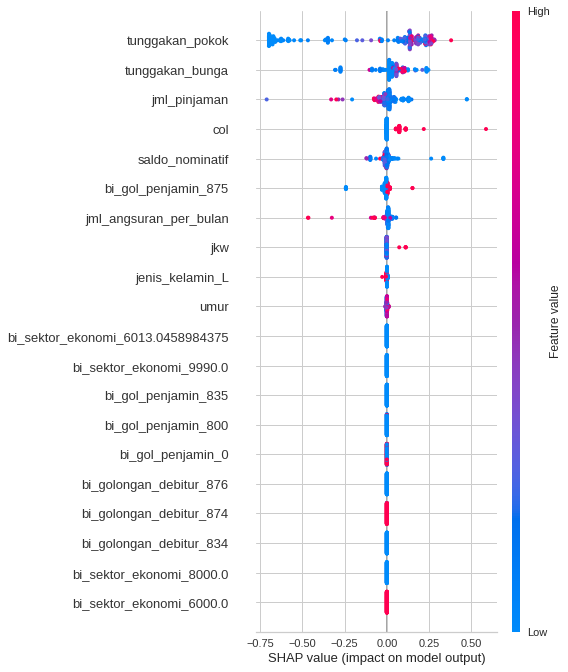

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [69]:
interpret_model(decision_tree_model)

Dari hasil tersebut diketahui bahwa variabel tunggakan_pokok memiliki pengaruh
paling besar dalam klasifikasi dengan nilai kepentingan tertinggi. Sedangkan variabel bi_sektor_ekonomi
mmenempati nilai kepentingan terendah dibandingkan kolom lainnya.

# Deployment / Rekomendasi

Variabel tunggakan pokok memiliki pengaruh paling besar terhadap status
kredit, maka dari itu untuk mengantisipasi masalah apakah nantinya nasabah tersebut dapat
membayar kredit lancar atau macet perlu ditinjau dan dipertimbangkan kembali khususnya
di beberapa feature yang memiliki nilai kepentingan / importance rate yang cukup tinggi.